#### 5 - Modeling
In this notebook, we will explore different models for answering our two main questions:
* Can we accurately indentify students who will be employed or unemployed based on their input features?
* Can we accurately predict the salary of students based on thier inputs features?

As such, we'll go through each question independently starting with the employment question

##### Predicting Employment

For this question, we want to see if we can predict the employment status of a student based on input features. As such, we'll begin by importing the relevant package

In [1]:
#Import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import our data set
df_data = pd.read_csv('Modeling_Data_PREPARED.csv')

In [3]:
#Let's check out the data set one more time
df_data.head()

,Unnamed: 0,female,ssc_p,ssc_Central,hsc_p,hsc_p_outlier,hsc_Central,hsc_s_commerce,hsc_s_science,degree_p,degree_p_outlier,degree_t_comm_mgmt,degree_t_sci_tech,work_experience,etest_p,specialisation_finance,mba_p,employed,salary,salary_gt0_outliers
0,0,0.0,0.538240,0.0,0.889621,0.0,0.0,1.0,0.0,0.195122,0.0,0.0,1.0,0.0,0.104167,0.0,0.284483,1.0,270000.0,0.0
1,1,0.0,0.792414,1.0,0.680890,0.0,0.0,0.0,1.0,0.670244,0.0,0.0,1.0,1.0,0.760417,1.0,0.564843,1.0,200000.0,0.0
2,2,0.0,0.497011,1.0,0.510708,0.0,1.0,0.0,0.0,0.341463,0.0,1.0,0.0,0.0,0.520833,1.0,0.247001,1.0,250000.0,0.0
3,3,0.0,0.311482,1.0,0.247117,0.0,1.0,0.0,1.0,0.048780,0.0,0.0,1.0,0.0,0.333333,0.0,0.308096,0.0,0.0,0.0
4,4,0.0,0.925788,1.0,0.602965,0.0,1.0,1.0,0.0,0.568293,0.0,1.0,0.0,0.0,0.975000,1.0,0.160795,1.0,425000.0,1.0


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              215 non-null    int64  
 1   female                  215 non-null    float64
 2   ssc_p                   215 non-null    float64
 3   ssc_Central             215 non-null    float64
 4   hsc_p                   215 non-null    float64
 5   hsc_p_outlier           215 non-null    float64
 6   hsc_Central             215 non-null    float64
 7   hsc_s_commerce          215 non-null    float64
 8   hsc_s_science           215 non-null    float64
 9   degree_p                215 non-null    float64
 10  degree_p_outlier        215 non-null    float64
 11  degree_t_comm_mgmt      215 non-null    float64
 12  degree_t_sci_tech       215 non-null    float64
 13  work_experience         215 non-null    float64
 14  etest_p                 215 non-null    fl

In [5]:
df_data.describe()

,Unnamed: 0,female,ssc_p,ssc_Central,hsc_p,hsc_p_outlier,hsc_Central,hsc_s_commerce,hsc_s_science,degree_p,degree_p_outlier,degree_t_comm_mgmt,degree_t_sci_tech,work_experience,etest_p,specialisation_finance,mba_p,employed,salary,salary_gt0_outliers
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,107.000000,0.353488,0.544494,0.539535,0.483248,0.037209,0.390698,0.525581,0.423256,0.399273,0.004651,0.674419,0.274419,0.344186,0.460428,0.558140,0.414850,0.688372,198702.325581,0.069767
std,62.209324,0.479168,0.223195,0.499598,0.179531,0.189716,0.489045,0.500510,0.495228,0.179482,0.068199,0.469685,0.447262,0.476211,0.276582,0.497767,0.218643,0.464240,154780.926716,0.255349
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,53.500000,0.000000,0.406308,0.000000,0.393740,0.000000,0.000000,0.000000,0.000000,0.268293,0.000000,0.000000,0.000000,0.000000,0.208333,0.000000,0.252436,0.000000,0.000000,0.000000
50%,107.000000,0.000000,0.538240,1.000000,0.461285,0.000000,0.000000,1.000000,0.000000,0.390244,0.000000,1.000000,0.000000,0.000000,0.437500,1.000000,0.404423,1.000000,240000.000000,0.000000
75%,160.500000,1.000000,0.717584,1.000000,0.593081,0.000000,1.000000,1.000000,1.000000,0.536585,0.000000,1.000000,1.000000,1.000000,0.697917,1.000000,0.563906,1.000000,282500.000000,0.000000
max,214.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,940000.000000,1.000000


In [6]:
#First, we can clear up the data table to drop things we don't need
# We don't need salary info or the Unnamed column
df_data_employed = df_data.drop(['Unnamed: 0','salary','salary_gt0_outliers'],axis =1)
df_data_employed.head()

,female,ssc_p,ssc_Central,hsc_p,hsc_p_outlier,hsc_Central,hsc_s_commerce,hsc_s_science,degree_p,degree_p_outlier,degree_t_comm_mgmt,degree_t_sci_tech,work_experience,etest_p,specialisation_finance,mba_p,employed
0,0.0,0.538240,0.0,0.889621,0.0,0.0,1.0,0.0,0.195122,0.0,0.0,1.0,0.0,0.104167,0.0,0.284483,1.0
1,0.0,0.792414,1.0,0.680890,0.0,0.0,0.0,1.0,0.670244,0.0,0.0,1.0,1.0,0.760417,1.0,0.564843,1.0
2,0.0,0.497011,1.0,0.510708,0.0,1.0,0.0,0.0,0.341463,0.0,1.0,0.0,0.0,0.520833,1.0,0.247001,1.0
3,0.0,0.311482,1.0,0.247117,0.0,1.0,0.0,1.0,0.048780,0.0,0.0,1.0,0.0,0.333333,0.0,0.308096,0.0
4,0.0,0.925788,1.0,0.602965,0.0,1.0,1.0,0.0,0.568293,0.0,1.0,0.0,0.0,0.975000,1.0,0.160795,1.0


First, let's see what we would get with a simple naive guesser just to set a baseline for oursevlves.

In [7]:
df_data_employed.describe()

,female,ssc_p,ssc_Central,hsc_p,hsc_p_outlier,hsc_Central,hsc_s_commerce,hsc_s_science,degree_p,degree_p_outlier,degree_t_comm_mgmt,degree_t_sci_tech,work_experience,etest_p,specialisation_finance,mba_p,employed
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.353488,0.544494,0.539535,0.483248,0.037209,0.390698,0.525581,0.423256,0.399273,0.004651,0.674419,0.274419,0.344186,0.460428,0.558140,0.414850,0.688372
std,0.479168,0.223195,0.499598,0.179531,0.189716,0.489045,0.500510,0.495228,0.179482,0.068199,0.469685,0.447262,0.476211,0.276582,0.497767,0.218643,0.464240
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.406308,0.000000,0.393740,0.000000,0.000000,0.000000,0.000000,0.268293,0.000000,0.000000,0.000000,0.000000,0.208333,0.000000,0.252436,0.000000
50%,0.000000,0.538240,1.000000,0.461285,0.000000,0.000000,1.000000,0.000000,0.390244,0.000000,1.000000,0.000000,0.000000,0.437500,1.000000,0.404423,1.000000
75%,1.000000,0.717584,1.000000,0.593081,0.000000,1.000000,1.000000,1.000000,0.536585,0.000000,1.000000,1.000000,1.000000,0.697917,1.000000,0.563906,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that ~68.8% of the observations are employed which means a naive estimator that simply predicted everyone would be employed would have an accuracy rate of ~68.8%.

#### What are worse: False Negative or False Positives?

We will define a "negative" in our context as an observation being unemployed and a "positive" as an observation being employed. In the context of the problem we are evaluating, it is probably far worse to have *false positives* than *false negatives.* The context reason is as follows: If an individual is predicted as being "unemployed" but ends truly being employed, this would be a *false negative.* However, this also means the person went from potentially being unemployed to being employed, which is a very good outcome (and more preferable.) The same cannot be said about the *false positive.* A *false positive* would be an individual being predicted as being employed and then ending up as unemployed, which is far worse in our context. This means that "precision" is something we need to be sensitive to as false positives and could be worse for observations if our model is deployed.

## Developing our model for predicting "employment"

#### Model 1: Logistic Regresison

Given that we have a classification style problem here, a good starting point for us would be logistic regression

In [8]:
#import relevant packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [155]:
#First, let's setup our X and Y variables
X = df_data_employed.drop(['employed'], axis =1)
y = df_data_employed['employed']

In [156]:
#Second, let's split our data into training data and test data. We'll use 25% for testing purposes.
#We set the random_state=1 for reproducability
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=1)

In [11]:
#Third, let's use GridSearchCV determine our regularization parameter of C
Cs = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
params = {'C':Cs}

#Instantiate our Logsistic Regression Object
logModel = LogisticRegression()

#Conduct GridSearch
logModel_opt = GridSearchCV(logModel, params)
logModel_opt.fit(X_train,y_train)
logModel_best = logModel_opt.best_estimator_

#Display the best params
f'The best C parameter is: {logModel_opt.best_params_}'

"The best C parameter is: {'C': 1}"

Based on our search, it would appear the best regularization parameter for our model (The C parameter) would be 1

In [12]:
#Now let's get the score of our best Logistic Regression Model
logModel_best.score(X_test,y_test)

0.8888888888888888

With Logistic Regression, it appears we can get an accuracy score of approximately 88.9%, which is an improvement over our naive classifier of simply labeling everything as "employed", which gave us an accuracy score of approximately 66.8%. Given that this is stark improvement (22 percentage points), we'd say that Logistic Regression sets the new standard for prediction. However, we should also check this model against a Random Forest Classifier as well.

#### Model 2: Random Forest

We can also use a Random Forest Classifier to predict whether a student will be employed or not, which is very common in practice so let's see how it does.

In [13]:
#import relevant packages
from sklearn.ensemble import RandomForestClassifier

We have already setup our variables from the previous model so now we can move directly to fitting the model

In [14]:
#Setup ranges for GridSearchCV to check
n_ests = list(range(100,500))
max_dep = list(range(2,15))
params = {'n_estimators':n_ests,'max_depth':max_dep}


#Instantiate RFC
rfc = RandomForestClassifier()

#Check RFC models
rfc_opt = GridSearchCV(rfc,params)
rfc_opt.fit(X_train,y_train)
rfc_best = rfc_opt.best_estimator_

#Display the best params
f'The best parameters are: {rfc_opt.best_params_}'

"The best parameters are: {'max_depth': 10, 'n_estimators': 103}"

In [15]:
#Now let's score our best RFC model
rfc_best.score(X_test,y_test)

0.8148148148148148

So oddly enough, at least as it currently stands, Logistic Regression gave us more accurate results than a Random Forest Classifier (even after we've expanded the Grid per our mentor's suggestion!) However, once thing to consider is that Accuracy is not the only measure we are concerned with. As previously stated, precision is something we need to consider given that we are more concerned about False Positives than we are about False negatives in this case. Therefore, let's evaluate the precision of these models.

In [16]:
#import relevant packages
from sklearn.metrics import precision_score

In [17]:
#First, let's score the precesion of our Random Forest Model
rfcPrecisionScore = precision_score(y_test,rfc_best.predict(X_test))
print(f' Random Forest Precision Score: {rfcPrecisionScore}')

 Random Forest Precision Score: 0.8292682926829268


In [18]:
#Second, let's score the precession of our Logistic Regression Model
logPrecisionScore = precision_score(y_test,logModel_best.predict(X_test))
print(f' Random Forest Precision Score: {logPrecisionScore}')

 Random Forest Precision Score: 0.8604651162790697


At least as of now, Logistic Regression appears to be outperforming our Random Forest Classifier. One caveat that should be considered is that parameter hyper tuning for a Random Forest can take on a lot more than it can for a Logistic Regression classifier which may account for the decreased performance. That said, we'll continue with the Logistic Regression model as we may also want to consider the ROC curve for it.

In [19]:
#import relevant packages
from sklearn.metrics import plot_roc_curve

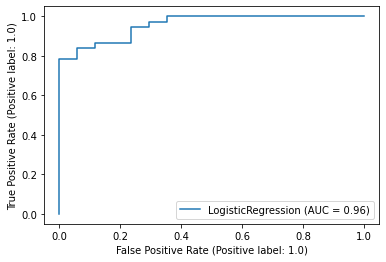

In [20]:
#Let's plot the ROC curve for the Logistic Regression Model
plot_roc_curve(logModel_best,X_test,y_test)

This ROC curve tells us that we can increase the accuracy of the model but quite a lot if we are willing to accept a higher False Positive rate but given our context, it probably makes more sense to stay with the more conservative approach of lower the False Positive rate, even if it means we have to give up some accuracy due to the nature of labeling someone as "employed" and then ending up as unemployed is a seriously bad outcome.

One last thing we can check is the confusion matrix for our logistic regression

In [32]:
#import relevant packages
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

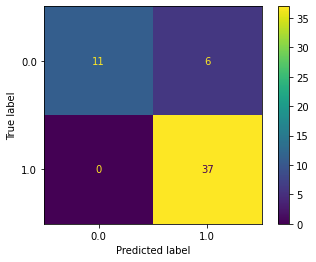

In [36]:
#Let's generate the confusion matrix for the Logistic Regression
plot_confusion_matrix(logModel_best, X_test, y_test)

Surprisingly, our model is very good at avoiding labeling someone as "unemployed" when they are in fact "employed" and overall appears to be quite solid in terms of accuracy!

Let's take a look at feature importance for our logistic regression

In [110]:
#First, let's get a list of our features
featureList = list(X.columns)

#Second, let's get our model coefficients
importanceCoeffs = logModel_best.coef_
importanceCoeffs = importanceCoeffs.tolist()

In [113]:
#Have to loop over the first element
importanceCoeffsHolder = []
for feature in range(0,len(importanceCoeffs[0])):
    importanceCoeffsHolder.append(importanceCoeffs[0][feature])

In [115]:
#Make positions
positions = range(0,len(importanceCoeffsHolder))

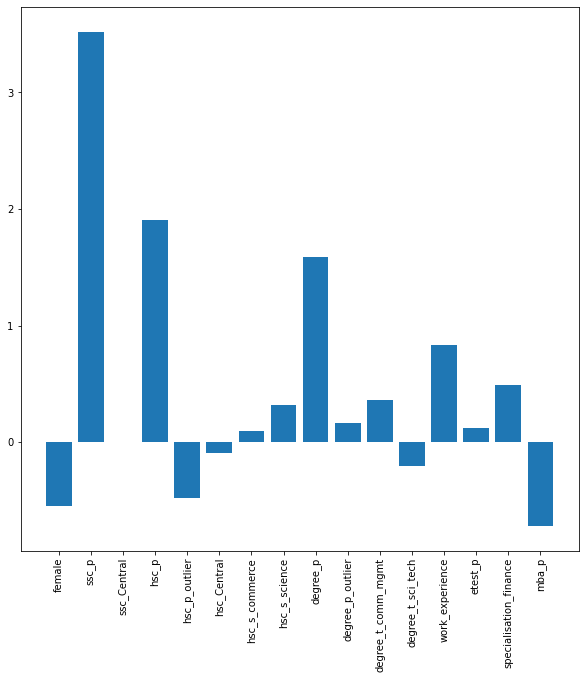

In [121]:
#Chart it
fig = plt.figure(figsize=(10,10))
plt.bar(positions, importanceCoeffsHolder)
plt.xticks(positions,featureList, rotation = 90)
plt.show()

Looking over our coefficients, we can see a few things. First, "ssc_p" seems to have a very large magnitude suggesting it is very important to prediction. Regretably, it woudl appear that being a female reduces your chances of being employed. "hsc_p" and "degree_p" also appaer to be very important. "Work experience" to also play a role in helping secure a job. Oddly enough, "mba_p" seems to be inversely correlated with being employed which is odd? That or it may imply that focusing on your studies too much to the detriment of other things not captured in the data may decrease your chances of employment (for example, maybe networking is more important to getting a job than getting high marks in an MBA program!)

One last model we can check is a Gradient Boosting Model

#### Model 3: Gradient Boosting Classifier

In [151]:
#import relevant packages
from sklearn.ensemble import GradientBoostingClassifier

In [157]:
#Setup ranges for GridSearchCV to check
learn_rate = [0.001, 0.01, 0.1, 1, 5, 10]
n_est = range(50,150)
params = {'learning_rate':learn_rate,'n_estimators':n_est}


#Instantiate GBC
gbc = GradientBoostingClassifier()

#Check RFC models
gbc_opt = GridSearchCV(gbc,params)
gbc_opt.fit(X_train,y_train)
gbc_best = gbc_opt.best_estimator_

#Display the best params
f'The best parameters are: {gbc_opt.best_params_}'

"The best parameters are: {'learning_rate': 1, 'n_estimators': 54}"

In [158]:
#Now let's score our Gradient Boosting Model
gbc_best.score(X_test,y_test)

0.7962962962962963

Our Gradient Boosting model still fell short of the logistic regression model so we are going to stop here.

Now, let's move to looking at predicting salary

## Developing our model to predict "salary"

#### Model 0: Linear Regression?

Linear regression is typical good starting point for most continuous variable predictions. In addition, because our y variable is not normally distributed, it may make sense to also consider non-parametric models as well.

<AxesSubplot:xlabel='salary', ylabel='Count'>

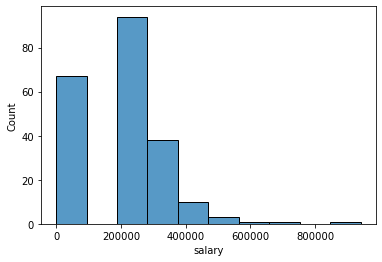

In [21]:
sns.histplot(df_data['salary'])

Looking at this histogram as a reminder, we can see a couple of things:
* There are a fair amount of observations that are zeros as if a student is classified as unemployed, by default their salary is zero
* Even if we were to remove these observations, our model still has a pretty drastic right tail so we would need to consider the distribution of the target feature

As such, it may make sense to consider non-parametric methods of prediction as well. A good starting point here may be the Random Forest Regressor. However, before that, let's set up our data appropriately and run the Linear Regression just to get a sense of what is going on.

In [159]:
#Let's setup our target feature and input features
X = df_data.drop(['salary','salary_gt0_outliers'],axis=1)
y = df_data['salary']

In [137]:
#Now let's split our data and provide a random_state to allow for reproducability
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=2)

In [147]:
#import relevant packages
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#### Model 0: Linear Regression

In [149]:
#First, let's instantiate the object
linreg = Lasso()
params = {'alpha':[0.01,0.1,1,5,10]}

#Second, we'll our fitting
linreg_opt = GridSearchCV(linreg,params)
linreg_opt.fit(X_train, y_train)
linreg_best = linreg_opt.best_estimator_

In [150]:
linreg_best.score(X_test, y_test)

0.8155853059395176

Apparently linear regression does a fairly good job of predicting salary for our purposes as we can get a R<sup>2</sup> of about 81.6%. As such, we may need to see if the other non-parametric models do a better job.

#### Model 1: Random Forest Regressor

In [26]:
#import relevant package
from sklearn.ensemble import RandomForestRegressor

Since we are using a Random Forest, technically we should doing a GridSearchCV to get our best hyper paramaters for modeling.

In [27]:
#Setup ranges for GridSearchCV to check
n_ests = list(range(100,150))
max_dep = list(range(2,5))
params = {'n_estimators':n_ests,'max_depth':max_dep}


#Instantiate RFC
rfr = RandomForestRegressor()

#Check RFC models
rfr_opt = GridSearchCV(rfr,params)
rfr_opt.fit(X_train,y_train)
rfr_best = rfr_opt.best_estimator_

#Display the best params
f'The best parameters are: {rfr_opt.best_params_}'

"The best parameters are: {'max_depth': 2, 'n_estimators': 134}"

In [28]:
#Now let's score our Random Forest Regressor
rfr_best.score(X_test, y_test)

0.8042473137607354

The R<sup>2</sup> score of our Random Forest Regressor is currently 80%, which sets a decent baseline for us to consider but is worse than our linear regression. That said, we may want to consider at least another model that can help us predict salary that is also non-parametric. As such, let's use the KNN Regressor model.

#### Model 2: KNN Regressor Model

In [29]:
#import relevant packages
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [30]:
#Setup ranges for GridSearchCV to check
n_neighs = [3,5,7]
weights = ['uniform','distance']
params = {'n_neighbors':n_neighs,'weights':weights}


#Instantiate KNR
knr = KNeighborsRegressor()

#Check KNR models
knr_opt = GridSearchCV(knr,params)
knr_opt.fit(X_train,y_train)
knr_best = knr_opt.best_estimator_

#Display the best params
f'The best parameters are: {knr_opt.best_params_}'

"The best parameters are: {'n_neighbors': 7, 'weights': 'distance'}"

In [31]:
#Now let's score the best model
knr_best.score(X_test, y_test)

-0.07283072142472524

Yikes! The KNN model apparently does not do well with this data set as we end up getting a negative R<sup>2</sup> score which would imply that this model does very poorly with this data set. Therefore, at least based on these results, we should probably stick with the Random Forest Regressor Model or linear regression model as our prediction model.

#### Wrap-Up
Alright, We've run a fair amount of models and I'm exhausted! I'm gonna submit this for feedback to see what else may need to be done. This was a lot of fun to think about! I do want to spend more time learning about Baysian Searching for Hyper Parameters though as GridSearchCV took a very long time!